In [1]:
import datetime
import json
import os
import pandas as pd
import holoviews as hv
import colorcet as cc
from bokeh import colors, palettes

In [2]:
# combos.json was extracted from https://github.com/TripSit/combogen.git
with open('combos.json') as f:
    combos = json.load(f)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
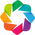

In [3]:
# Show more rows when printing all data
pd.options.display.max_rows = 100
# Chord plot settings
hv.extension('bokeh')
%output size=300

In [4]:
DATA_DIR = 'data'
# Highly arbitrary: for how long should a combination have been pressed
# to call it "real" and not just a transition to another desired state,
# accidental press, etc.? There doesn't seem to be a smooth cutoff anywhere...
PRESS_CUTOFF_MS = 500
# First/last drugs in the CSV header
HEADER_DRUG_START = 'LSD'
HEADER_DRUG_END = 'SSRIs'

In [5]:
DRUG_CLASSES = {
    'Psychedelics': [
        'LSD',
        'Mushrooms',
        'DMT',
        'Mescaline',
        'DOx',
        'NBOMes',
        '2C-x',
        '2C-T-x',
        '5-MeO-xxT',
        'Cannabis',
    ],
    # Keep Dissociatives-Depressants-Anti-Depressants adjacent;
    # they have the most dangerous interactions which are
    # easier to read closer together.
    'Stimulants': [
        'Amphetamines',
        'MDMA',
        'Cocaine',
        'Caffeine',
    ],
    'Dissociatives': [
        'Ketamine',
        'MXE',
        'DXM',
        'Nitrous',
    ],
    'Depressants': [
        'Alcohol',
        'GHB/GBL',
        'Opioids',
        'Tramadol',
        'Benzodiazepines',
    ],
    'Anti-Depressants': [
        'MAOIs',
        'SSRIs',
    ],
}
DRUG_COLORS = {
    'Psychedelics': [
        palettes.Category20b[20][1*4 + 1],
        palettes.Category20b[20][1*4 + 3],
    ],
    'Dissociatives': [
        palettes.Category20b[20][4*4 + 1],
        palettes.Category20b[20][4*4 + 3],
    ],
    'Stimulants': [
        palettes.Category20b[20][3*4 + 1],
        palettes.Category20b[20][3*4 + 3],
    ],
    'Depressants': [
        palettes.Category20b[20][0*4 + 1],
        palettes.Category20b[20][0*4 + 3],
    ],
    'Anti-Depressants': [
        palettes.Category20b[20][2*4 + 1],
        palettes.Category20b[20][2*4 + 3],
    ],
}
# Order these from least to most significant; this makes it easy to
# pick max(INTERACTION_LOOKUP[]) as the interaction to show for >2 drugs.
INTERACTION_COLORS = {
    'Low Risk & No Synergy': colors.RGB(32, 103, 45, 0.25),
    'Low Risk & Decrease': colors.RGB(0, 0, 255, 0.25),
    'Low Risk & Synergy': colors.RGB(128, 0, 255, 0.25),
    'Caution': colors.RGB(255, 216, 68, 0.65),
    'Unsafe': colors.RGB(255, 128, 0, 0.75),
    'Dangerous': colors.RGB(255, 0, 0, 1),
}
INTERACTION_LOOKUP = list(INTERACTION_COLORS.keys())
INTERACTION_COLORMAP = [INTERACTION_COLORS[k] for k in INTERACTION_LOOKUP]
INTERACTION_LOOKUP = {k: INTERACTION_LOOKUP.index(k) for k in INTERACTION_LOOKUP}
INTERACTION_COLORMAP_NOALPHA = [color.to_hex() for color in INTERACTION_COLORMAP]

In [6]:
# Import data from all CSVs in the current directory
data = pd.DataFrame()
for f in os.listdir(DATA_DIR):
    if f.lower().endswith('.csv'):
        f = os.path.join(DATA_DIR, f)
        # Date, Time columns will be concatenated and parsed as a datetime into Date_Time
        data = pd.concat((data, pd.read_csv(f, parse_dates=[['Date', 'Time']])))

In [7]:
# Sort by datetime
data = data.sort_values('Date_Time')
data.index = data['Date_Time']

In [8]:
# Count number of buttons pressed in each row
data['num_pressed'] = data.loc[:, HEADER_DRUG_START:HEADER_DRUG_END].sum(axis=1)

In [9]:
# Move "ms since last" up one row for ms_pressed: how long the given row was pressed
data['ms_pressed'] = data['ms since last'].shift(-1)
data.shape[0]

54463

In [10]:
# Rows with nothing pressed for more than one minute: call these breaks between sessions,
# giving an approximate number of sessions
data.loc[(data['num_pressed'] == 0) & (data['ms_pressed'] > 60*1000)].shape[0]

519

In [11]:
real_multi_press = data.loc[
    # Select rows with more than one drug pressed, held for our arbitrary cutoff
    (data['num_pressed'] > 1) & (data['ms_pressed'] > PRESS_CUTOFF_MS),
    # Exclude all columns except drug presses
    HEADER_DRUG_START:HEADER_DRUG_END
]
real_multi_press.shape[0]

6467

In [12]:
# Generate data similar to bokeh.sampledata.les_mis.data
# First, a node for each drug with groups for DRUG_CLASSES
nodes = []
# While we're at it, build colormap
drug_colormap = []
for idx, klass in enumerate(DRUG_CLASSES):
    class_colors = DRUG_COLORS[klass]
    for didx, drug in enumerate(DRUG_CLASSES[klass]):
        nodes.append({'name': drug, 'class': klass})
        drug_colormap.append(class_colors[didx % len(class_colors)])

In [13]:
# Then, links between each pair of drugs with value equal to number of times pressed together
links = []
rmp = real_multi_press
# Compare one drug...
for idx1, node1 in enumerate(nodes):
    name1 = node1['name']
    # ...with all other drugs after it
    for idx2, node2 in enumerate(nodes[idx1+1:]):
        # enumerate() starts idx2 at 0; we want it to start at idx1+1
        idx2 += idx1 + 1
        name2 = node2['name']
        links.append({
            'source': idx1,
            'target': idx2,
            # Number of real presses
            'value': rmp.loc[
                # where node1 was pressed
                (rmp[name1] == 1) &
                # and node2 was pressed
                (rmp[name2] == 1)
            ].shape[0],
            'interaction': INTERACTION_LOOKUP[combos[name1][name2]],
            'source_name': name1,
            'target_name': name2,
        })
links_df = pd.DataFrame(links)
links_df = links_df[['source', 'target', 'value', 'interaction', 'source_name', 'target_name']]
nodes_df = pd.DataFrame(nodes)
nodes_ds = hv.Dataset(nodes_df, 'index')

In [14]:
chord = hv.Chord((links_df, nodes_ds)).options(label_index='name', color_index='index', edge_color_index='interaction',
    cmap=drug_colormap, edge_cmap=INTERACTION_COLORMAP)
renderer = hv.renderer('bokeh')
renderer.save(chord, 'chord')
chord

:Chord   [source,target]   (value,interaction,source_name,target_name)

In [15]:
total_tests = links_df['value'].sum()
top_combos = []
for idx, row in links_df.sort_values('value', ascending=False).head(20).iterrows():
    name1 = row['source_name']
    name2 = row['target_name']
    top_combos.append({
        'Combination': '{}, {}'.format(name1, name2),
        'Percent of Tests': row['value'] / total_tests * 100,
        'Interaction': INTERACTION_LOOKUP[combos[name1][name2]]
    })
top_combos = pd.DataFrame(top_combos)
top_combos = top_combos[['Combination', 'Percent of Tests', 'Interaction']]

In [16]:
tcbars = hv.Bars(top_combos).options(
    invert_axes=True, invert_yaxis=True, show_legend=True,
    color_index='Interaction', cmap=INTERACTION_COLORMAP_NOALPHA)
renderer.save(tcbars, 'top_combos')
tcbars

:Bars   [Combination]   (Percent of Tests,Interaction)

In [17]:
# Given presses of more than one button,
# how many times was each drug pressed? 
totals = real_multi_press.sum().to_frame()
totals.columns = ['Tests']
totals.index.name = 'Substance'
bars_cmap = []
for idx, drug in enumerate(totals.index):
    for klass in DRUG_CLASSES:
        if drug in DRUG_CLASSES[klass]:
            dcolors = DRUG_COLORS[klass]
            bars_cmap.append(dcolors[idx % len(dcolors)])

In [18]:
totbars = hv.Bars(totals).options(
    invert_axes=True, invert_yaxis=True, color_index='Substance', show_legend=True, cmap=bars_cmap)
renderer.save(totbars, 'totals')
totbars

:Bars   [Substance]   (Tests)

In [19]:
threes = []
num_nodes = len(nodes)
for idx1 in range(num_nodes):
    n1 = nodes[idx1]['name']
    for idx2 in range(idx1 + 1, num_nodes):
        n2 = nodes[idx2]['name']
        inter1 = INTERACTION_LOOKUP[combos[n1][n2]]
        for idx3 in range(idx2 + 1, num_nodes):
            n3 = nodes[idx3]['name']
            inter2 = INTERACTION_LOOKUP[combos[n1][n3]]
            inter3 = INTERACTION_LOOKUP[combos[n2][n3]]
            interaction = max(inter1, inter2, inter3)
            threes.append({
                'Combination': '{}, {}, {}'.format(n1, n2, n3),
                'Occurrences': rmp.loc[
                    (rmp[n1] == 1) &
                    (rmp[n2] == 1) &
                    (rmp[n3] == 1)
                ].shape[0],
                'Interaction': interaction,
            })
threes_df = pd.DataFrame(threes)

In [20]:
total_threes = threes_df['Occurrences'].sum()
top_threes = []
for idx, row in threes_df.sort_values('Occurrences', ascending=False).head(20).iterrows():
    top_threes.append({
        'Combination': row['Combination'],
        'Percent of Tests': row['Occurrences'] / total_threes * 100,
        'Interaction': row['Interaction'],
    })
top_threes = pd.DataFrame(top_threes)
top_threes = top_threes[['Combination', 'Percent of Tests', 'Interaction']]
# WTF holoviews/bokeh/whatever?! If a given index in cmap isn't in the Interaction
# column, all colors are reordered, causing incredible frustration.
# So, custom-tailor the colormap to only include the colors actually needed/used.
ugh_colormap = [color for idx, color in enumerate(INTERACTION_COLORMAP_NOALPHA) if idx in top_threes['Interaction'].unique()]

In [21]:
t3bars = hv.Bars(top_threes).options(
    invert_axes=True, invert_yaxis=True, color_index='Interaction', cmap=ugh_colormap)
renderer.save(t3bars, 'top_threes')
t3bars

:Bars   [Combination]   (Percent of Tests,Interaction)

In [22]:
for i in range(24):
    start = datetime.time(i)
    end = datetime.time((i + 1) % 24)
    chunk = rmp.between_time(start, end)
    if chunk.shape[0] < 100:
        continue
    count = chunk.shape[0]
    chunk_sum = chunk.sum()
    idxmax = chunk_sum.idxmax()
    percent = chunk_sum[idxmax] / count * 100
    print('{} to {}: {:4} tests, {} = {:.0f}%'.format(start, end, count, idxmax, percent))

00:00:00 to 01:00:00:  920 tests, LSD = 24%
01:00:00 to 02:00:00:  382 tests, Alcohol = 26%
02:00:00 to 03:00:00:  456 tests, Alcohol = 30%
03:00:00 to 04:00:00:  509 tests, Alcohol = 28%
04:00:00 to 05:00:00:  200 tests, MDMA = 30%
05:00:00 to 06:00:00:  147 tests, Ketamine = 37%
19:00:00 to 20:00:00:  288 tests, Cannabis = 23%
20:00:00 to 21:00:00:  274 tests, LSD = 21%
21:00:00 to 22:00:00:  512 tests, Cannabis = 25%
22:00:00 to 23:00:00: 1166 tests, Alcohol = 26%
23:00:00 to 00:00:00: 1264 tests, LSD = 23%


In [23]:
festivals = {
    'Plunge': rmp.loc['2018-5-23':'2018-5-28'],
    'Priceless': rmp.loc['2018-6-28':'2018-7-2'],
    'BurningMan': rmp.loc['2018-8-26':'2018-9-1'],
}

In [24]:
from itertools import product
index, groups = ['A', 'B'], ['a', 'b']
keys = product(index, groups)
list(keys)

[('A', 'a'), ('A', 'b'), ('B', 'a'), ('B', 'b')]

In [25]:
drug_order = list(totals.sort_values('Tests', ascending=False).index)
fest_data = []
for name, fest in festivals.items():
    fest_tests = fest.shape[0]
    fest_sum = fest.sum()
    for drug in drug_order:
        fest_data.append((drug, name, fest_sum[drug] / fest_tests * 100))
fest_data
    

[('LSD', 'Plunge', 23.64864864864865),
 ('Alcohol', 'Plunge', 30.067567567567565),
 ('MDMA', 'Plunge', 21.70608108108108),
 ('Cannabis', 'Plunge', 20.18581081081081),
 ('Mushrooms', 'Plunge', 17.22972972972973),
 ('Cocaine', 'Plunge', 19.763513513513516),
 ('Ketamine', 'Plunge', 10.050675675675675),
 ('Caffeine', 'Plunge', 12.58445945945946),
 ('Nitrous', 'Plunge', 12.753378378378377),
 ('Amphetamines', 'Plunge', 8.783783783783784),
 ('DMT', 'Plunge', 6.25),
 ('SSRIs', 'Plunge', 7.179054054054054),
 ('GHB/GBL', 'Plunge', 5.320945945945946),
 ('Benzodiazepines', 'Plunge', 6.672297297297297),
 ('Mescaline', 'Plunge', 7.094594594594595),
 ('Opioids', 'Plunge', 6.756756756756757),
 ('Tramadol', 'Plunge', 5.743243243243244),
 ('MAOIs', 'Plunge', 5.574324324324325),
 ('2C-x', 'Plunge', 4.054054054054054),
 ('MXE', 'Plunge', 3.5472972972972974),
 ('2C-T-x', 'Plunge', 3.040540540540541),
 ('5-MeO-xxT', 'Plunge', 2.7871621621621623),
 ('NBOMes', 'Plunge', 3.6317567567567566),
 ('DXM', 'Plunge',

In [26]:
bars = hv.Bars(fest_data, ['Drug', 'Festival'], 'Percent of Tests').options(
    invert_axes=True, invert_yaxis=True, labelled=[])
bars

:Bars   [Drug,Festival]   (Percent of Tests)

In [28]:
# Holoviews sucks at legends; build ours manually.
legend_colors = [{'thing': k, 'val': 0} for k in INTERACTION_COLORS.keys()]
legend_colors = pd.DataFrame(legend_colors)
legend_colors.index = legend_colors['thing']
legend_colors = legend_colors[['val']]
legend_colors.index.name = 'idx'
lgnd = hv.Bars(legend_colors).options(
    color_index='idx', cmap=INTERACTION_COLORMAP_NOALPHA, show_legend=True)
lgnd

:Bars   [idx]   (val)

In [29]:
# Holoviews sucks at legends; build ours manually.
legend_colors = [{'thing': k, 'val': 0} for k in DRUG_COLORS.keys()]
legend_colors = pd.DataFrame(legend_colors)
legend_colors.index = legend_colors['thing']
legend_colors = legend_colors[['val']]
legend_colors.index.name = 'idx'
lgnd = hv.Bars(legend_colors).options(
    color_index='idx', cmap=[DRUG_COLORS[k][0] for k in DRUG_COLORS.keys()], show_legend=True)
lgnd

:Bars   [idx]   (val)